# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Priskilla Novianna Puteri Br Silalahi
- **Email:** priskillanps@gmail.com
- **ID Dicoding:** priskillanps

## Menentukan Pertanyaan Bisnis

- Bagaimana pola permintaan sepeda berdasarkan musim dan cuaca?
- Apa faktor utama yang mempengaruhi lonjakan penyewaan sepeda pada jam-jam tertentu?



## Import Semua Packages/Library yang Digunakan

In [2]:
#preparing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
#importing the datasets
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Data Wrangling

### Gathering Data
Proses pengumpulan datasets

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Bike Sharing"

In [6]:
#changing the working directory
%cd /content/gdrive/My Drive/Bike Sharing
#Check the present working directory using pwd command
!pwd

/content/gdrive/My Drive/Bike Sharing
/content/gdrive/My Drive/Bike Sharing


In [7]:
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
100% 286k/286k [00:00<00:00, 848kB/s]
100% 286k/286k [00:00<00:00, 839kB/s]


In [8]:
!ls

 bike-sharing-dataset.zip  'kaggle (3).json'


In [9]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  bike-sharing-dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                



###Assesing Data


Tahap ini yang bertujuan untuk mengidentifikasi masalah yang terdapat dalam data dan memastikan data tersebut berkualitas.




In [16]:
#read the datasets
df_day = pd.read_csv('/content/gdrive/MyDrive/Bike Sharing/day.csv')
df_hour = pd.read_csv('/content/gdrive/MyDrive/Bike Sharing/hour.csv')

In [17]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [21]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [19]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Tidak terdapat missing values.

In [20]:
df_day.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [22]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [23]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [24]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [25]:
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Tidak terdapat missing values.

In [26]:
df_hour.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


Kita dapat melihat bahwa ada ketidakkonsistenan pada dataset. Dataset df_day memiliki 3 unique values pada kolom weathersit, sedangkan dataset df_hour memiliki 4 unique values pada kolom yang sama.

In [27]:
df_bikesharing = pd.merge(df_day, df_hour, on='dteday', how='inner', suffixes=('_daily', '_hourly'))
print(df_bikesharing.head())


   instant_daily      dteday  season_daily  yr_daily  mnth_daily  \
0              1  2011-01-01             1         0           1   
1              1  2011-01-01             1         0           1   
2              1  2011-01-01             1         0           1   
3              1  2011-01-01             1         0           1   
4              1  2011-01-01             1         0           1   

   holiday_daily  weekday_daily  workingday_daily  weathersit_daily  \
0              0              6                 0                 2   
1              0              6                 0                 2   
2              0              6                 0                 2   
3              0              6                 0                 2   
4              0              6                 0                 2   

   temp_daily  ...  weekday_hourly  workingday_hourly  weathersit_hourly  \
0    0.344167  ...               6                  0                  1   
1    0.34416

In [28]:
df_bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant_daily      17379 non-null  int64  
 1   dteday             17379 non-null  object 
 2   season_daily       17379 non-null  int64  
 3   yr_daily           17379 non-null  int64  
 4   mnth_daily         17379 non-null  int64  
 5   holiday_daily      17379 non-null  int64  
 6   weekday_daily      17379 non-null  int64  
 7   workingday_daily   17379 non-null  int64  
 8   weathersit_daily   17379 non-null  int64  
 9   temp_daily         17379 non-null  float64
 10  atemp_daily        17379 non-null  float64
 11  hum_daily          17379 non-null  float64
 12  windspeed_daily    17379 non-null  float64
 13  casual_daily       17379 non-null  int64  
 14  registered_daily   17379 non-null  int64  
 15  cnt_daily          17379 non-null  int64  
 16  instant_hourly     173

In [29]:
df_bikesharing.describe()

,instant_daily,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [30]:
df_bikesharing.isna().sum()

,0
instant_daily,0
dteday,0
season_daily,0
yr_daily,0
mnth_daily,0
holiday_daily,0
weekday_daily,0
workingday_daily,0
weathersit_daily,0
temp_daily,0


In [31]:
print("Duplicate data: ", df_bikesharing.duplicated().sum())

Duplicate data:  0


## Cleaning Data

Pada tahap ini kita melakukan pembersihan data terhadap outlier.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


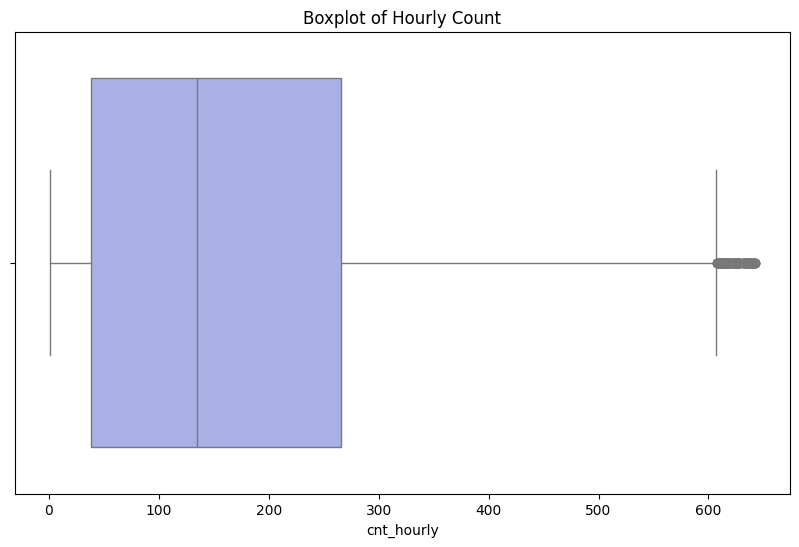

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


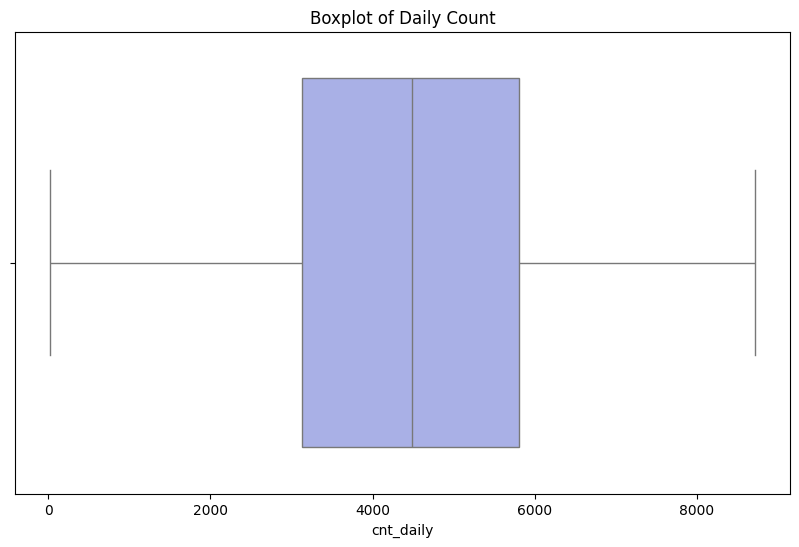

Outliers in cnt_hourly:  134
Outliers in cnt_daily:  0


In [65]:
# Checking outliers for cnt_hourly
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_bikesharing['cnt_hourly'], color='#9fa8f0')
plt.title('Boxplot of Hourly Count')
plt.show()

# Checking outliers for cnt_daily
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_bikesharing['cnt_daily'], color='#9fa8f0')
plt.title('Boxplot of Daily Count')
plt.show()

# Calculate the IQR for cnt_hourly and cnt_daily
Q1 = df_bikesharing['cnt_hourly'].quantile(0.25)
Q3 = df_bikesharing['cnt_hourly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_bikesharing[(df_bikesharing['cnt_hourly'] < lower_bound) | (df_bikesharing['cnt_hourly'] > upper_bound)]
print("Outliers in cnt_hourly: ", outliers.shape[0])


Q1 = df_bikesharing['cnt_daily'].quantile(0.25)
Q3 = df_bikesharing['cnt_daily'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_bikesharing[(df_bikesharing['cnt_daily'] < lower_bound) | (df_bikesharing['cnt_daily'] > upper_bound)]
print("Outliers in cnt_daily: ", outliers.shape[0])


Kita melakukan pengecekan outlier dan diperoleh bahwa terdapat 134 data outlier pada target varibles yaitu cnt_hourly.

In [71]:
# Calculate the IQR for cnt_hourly
Q1 = df_bikesharing['cnt_hourly'].quantile(0.25)
Q3 = df_bikesharing['cnt_hourly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_bikesharing_cleaned = df_bikesharing[(df_bikesharing['cnt_hourly'] >= lower_bound) & (df_bikesharing['cnt_hourly'] <= upper_bound)]

# Print the number of rows removed
print("Number of rows removed: ", df_bikesharing.shape[0] - df_bikesharing_cleaned.shape[0])

# Replace df_bikesharing with the cleaned DataFrame
df_bikesharing = df_bikesharing_cleaned


Number of rows removed:  134


In [102]:
print(df_bikesharing.shape)

(16740, 32)


## Exploratory Data Analysis (EDA)

Tahap ini merupakan proses analisis data yang bertujuan untuk mengeksplorasi dan mengenal sebuah data. Pada prosesnya sering kali mulai dengan mendefinisikan berbagai pertanyaan atau hanya menggali data guna menemukan beberapa insight yang menarik dari sebuah data. Insight inilah yang akan digunakan untuk menjawab permasalahan bisnis yang dihadapi.



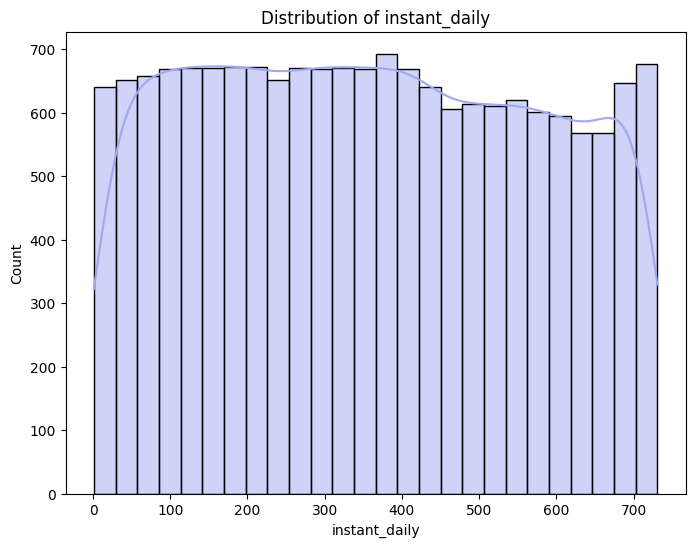

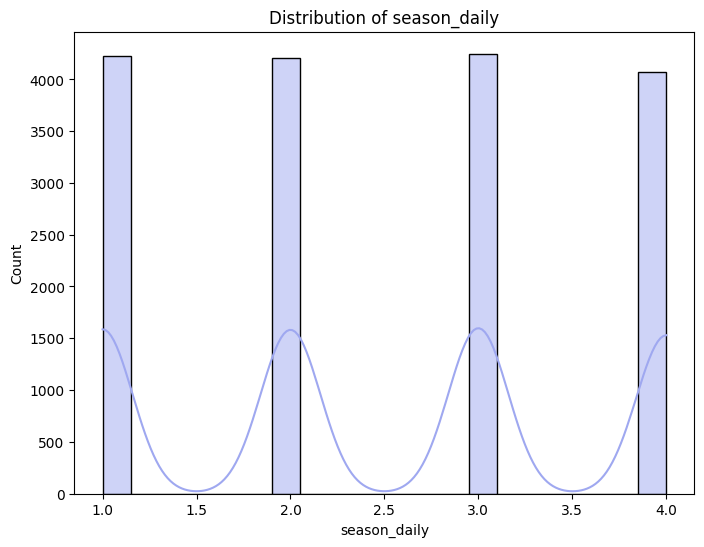

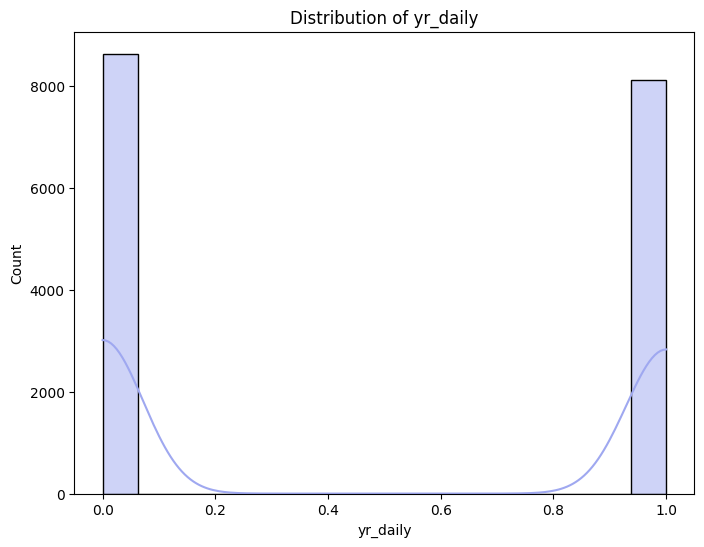

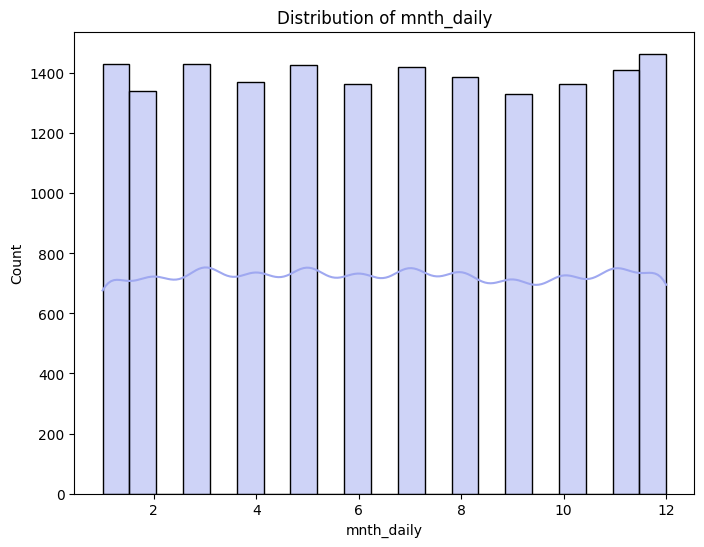

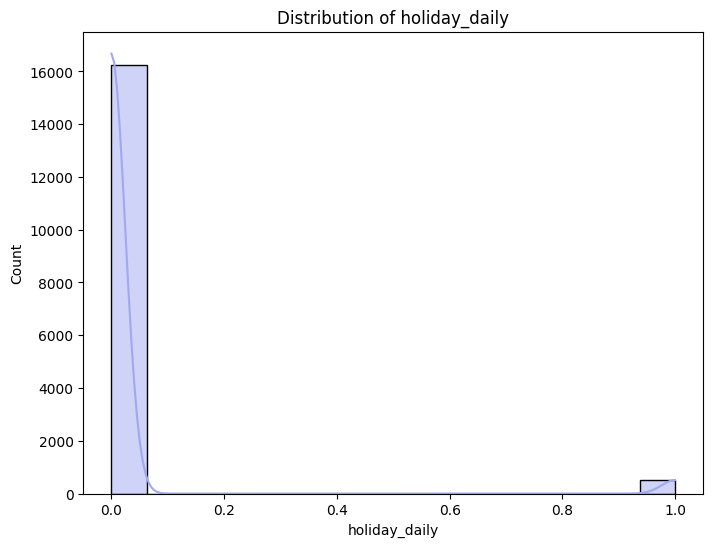

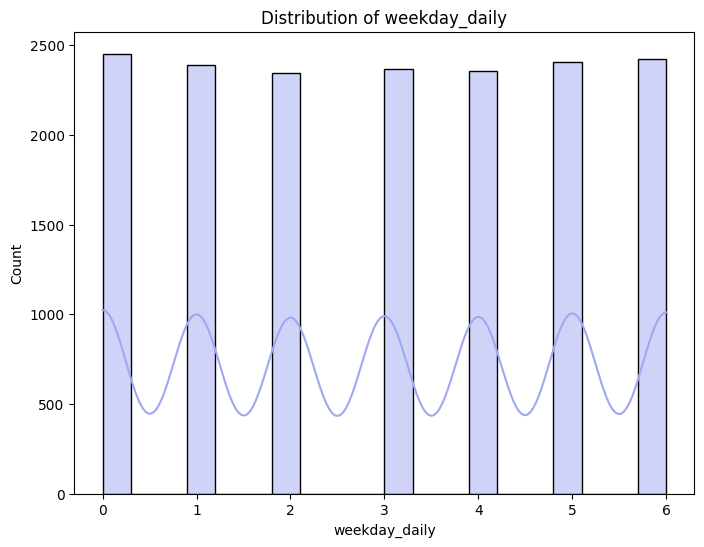

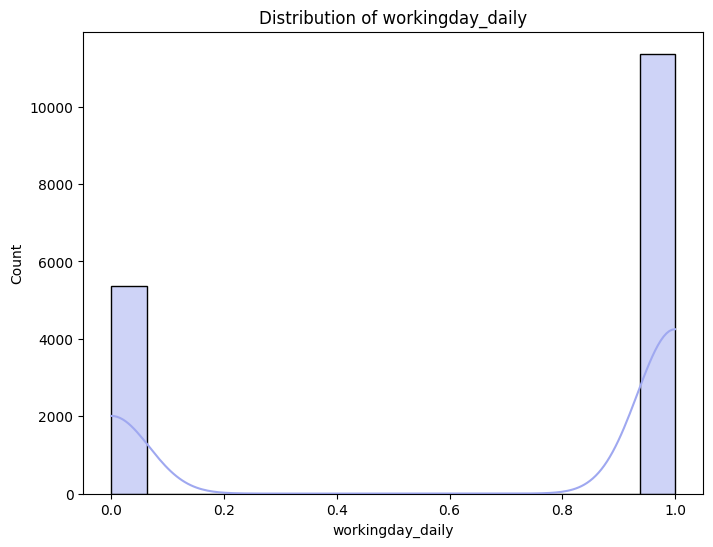

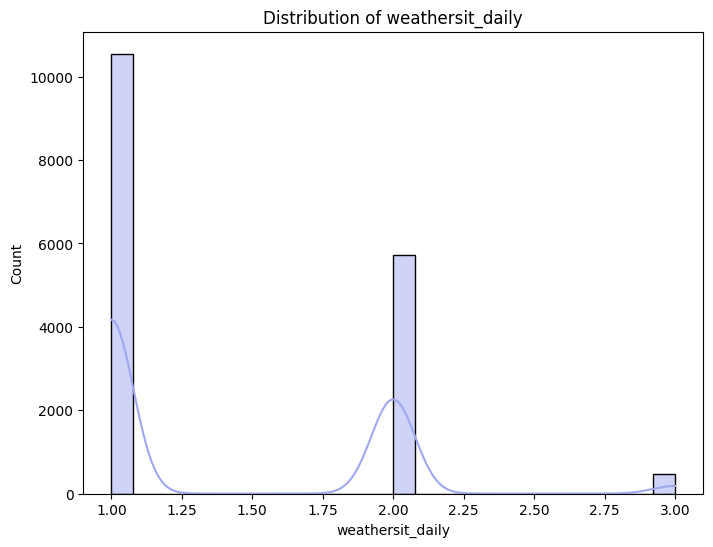

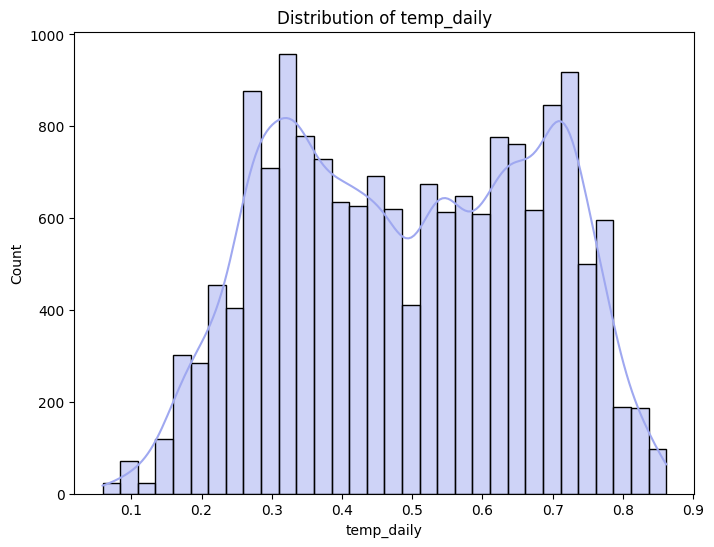

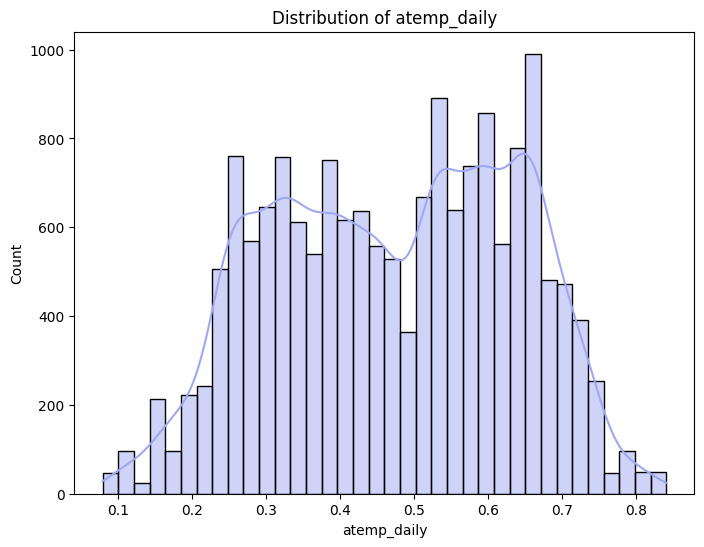

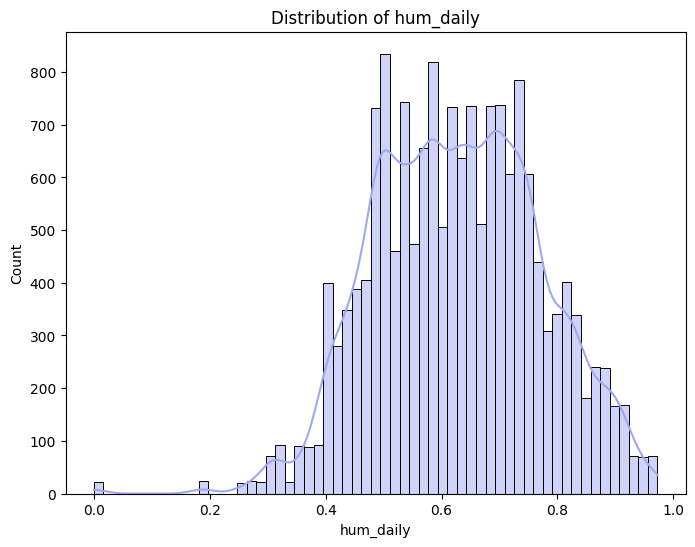

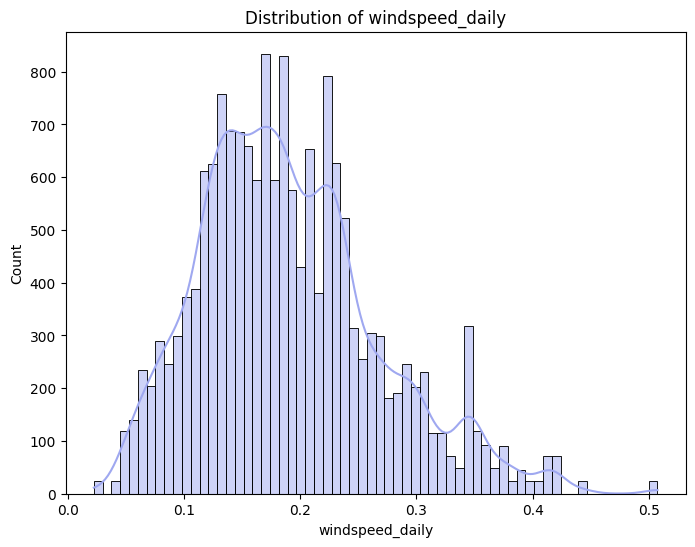

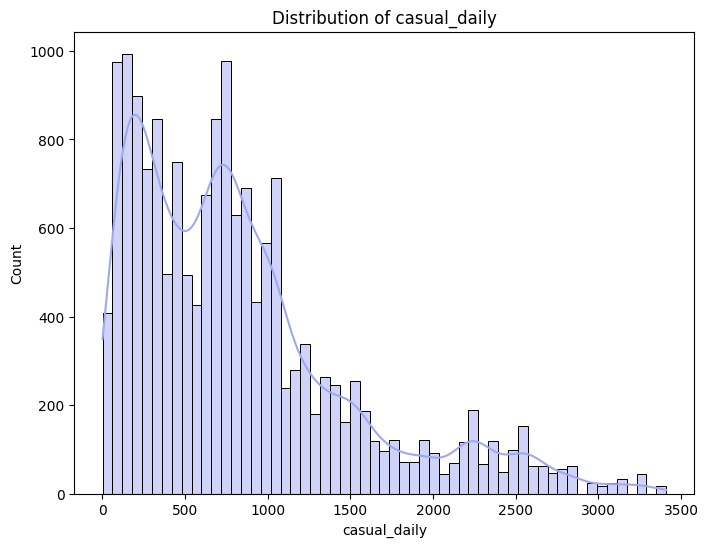

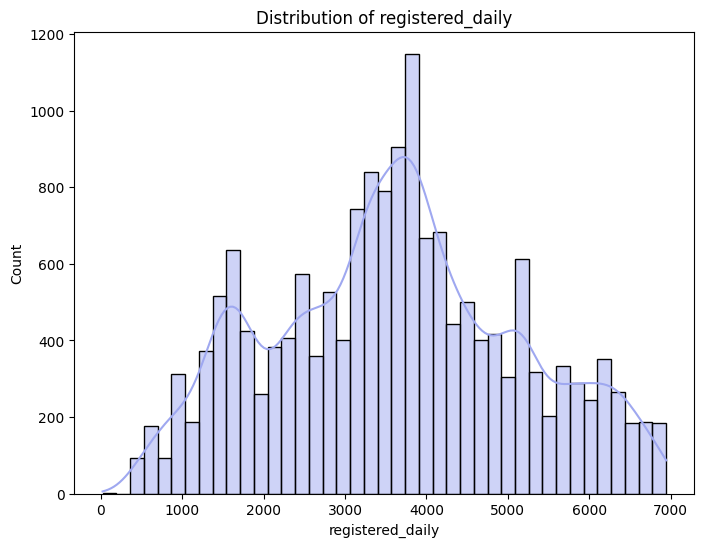

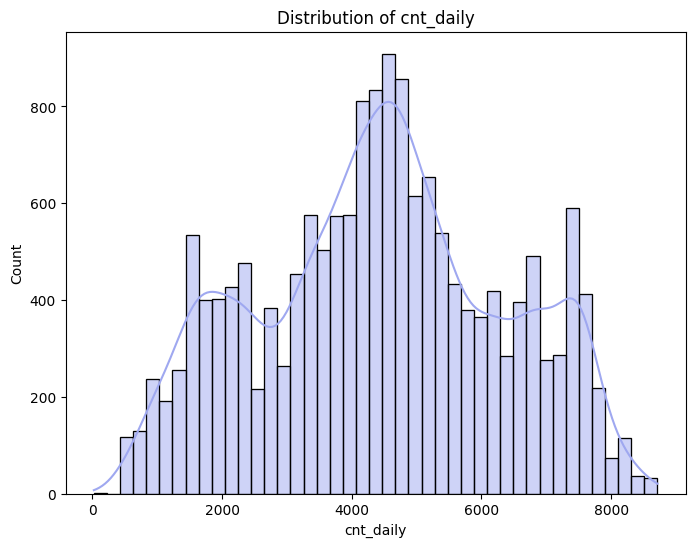

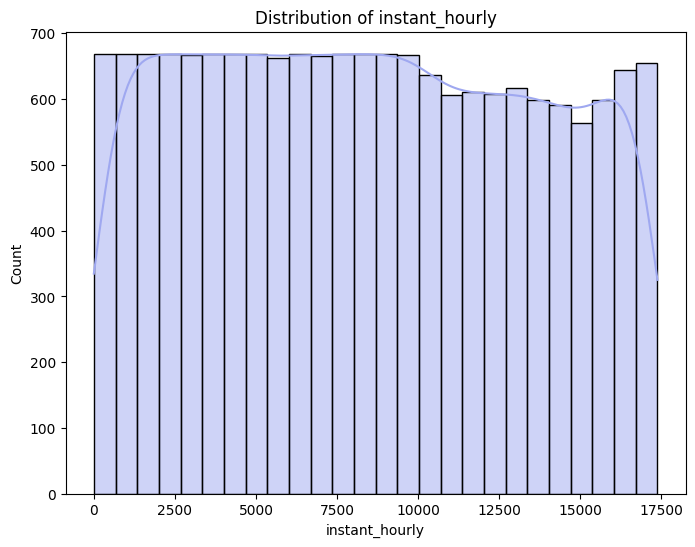

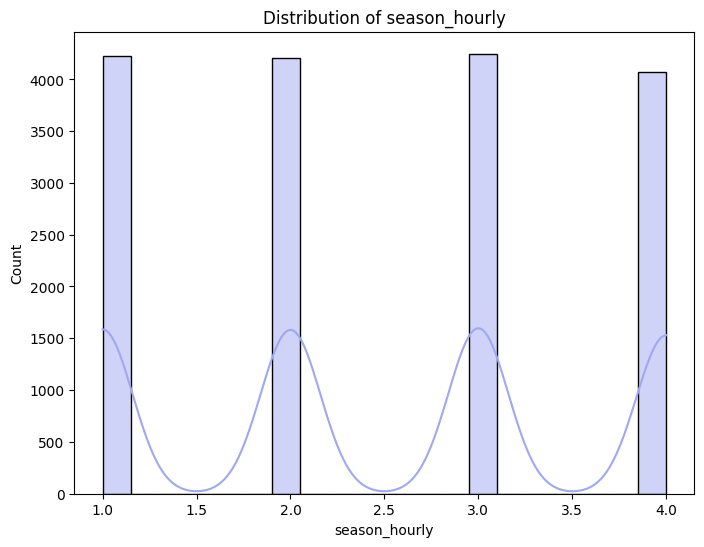

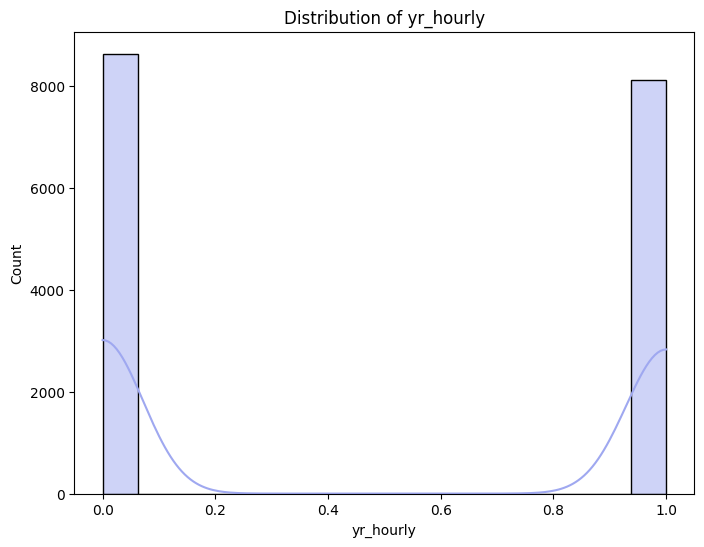

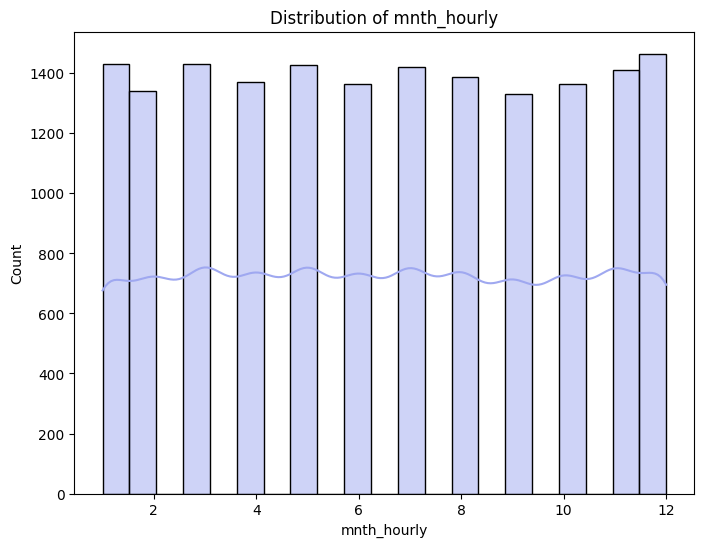

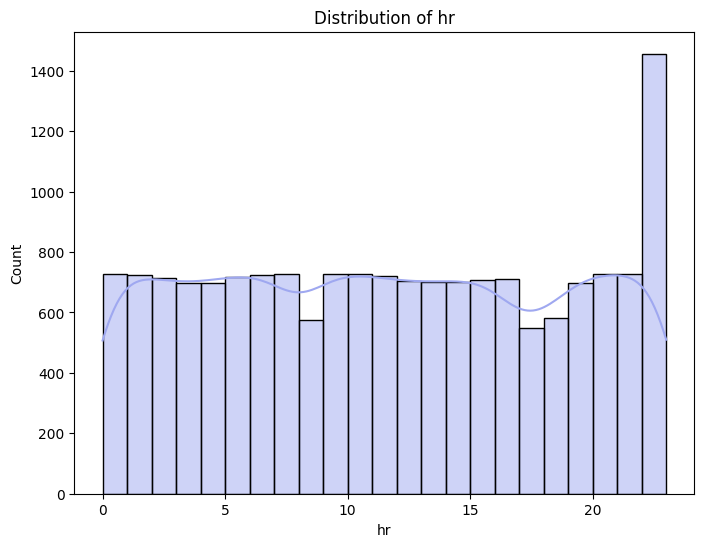

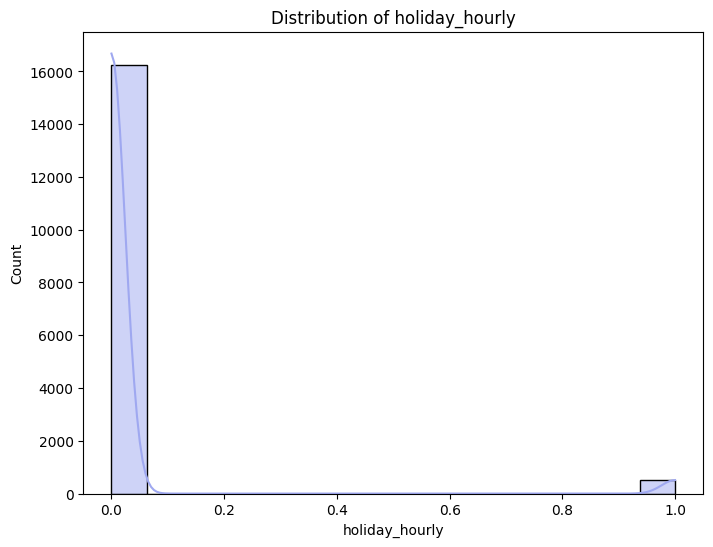

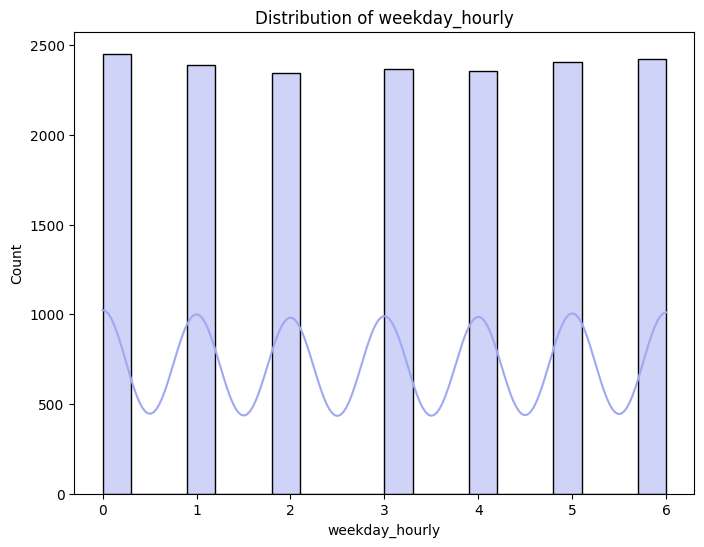

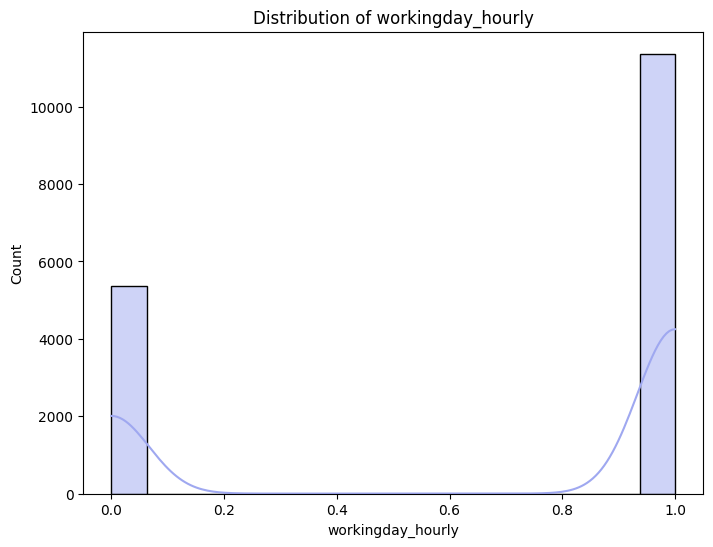

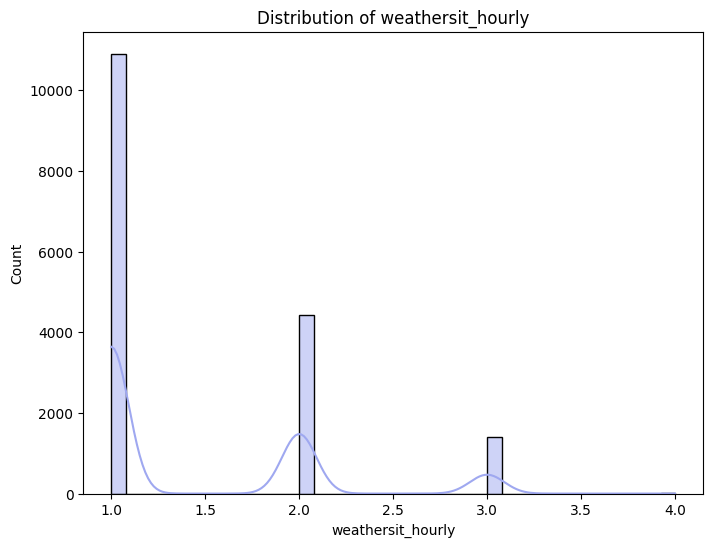

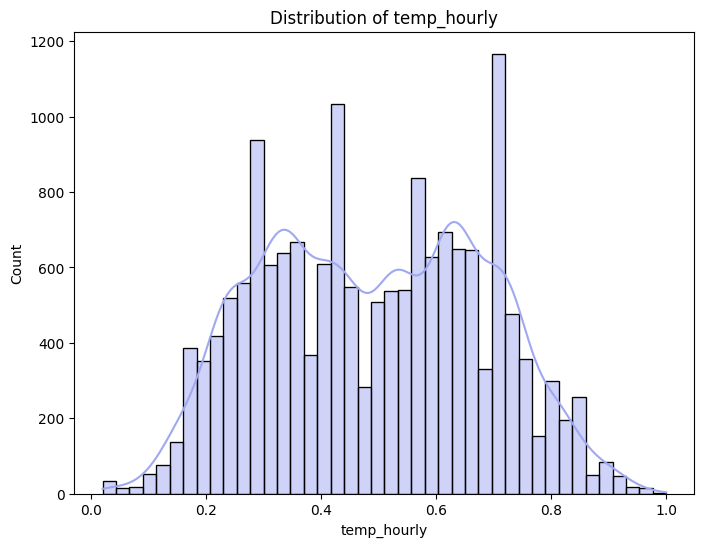

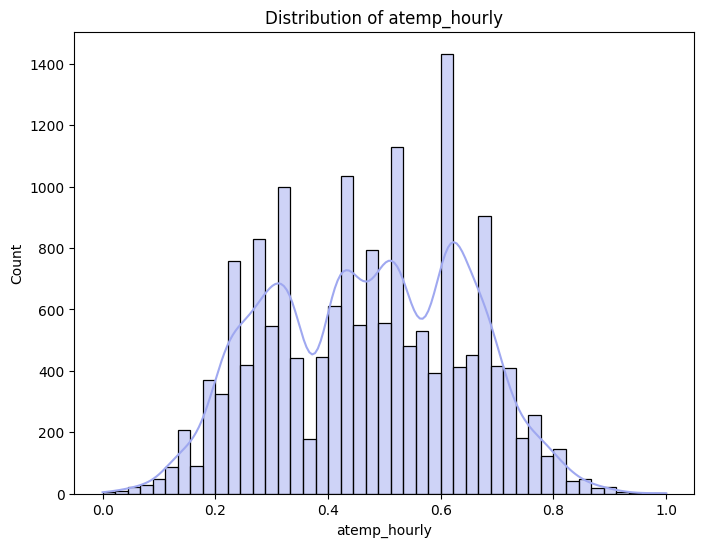

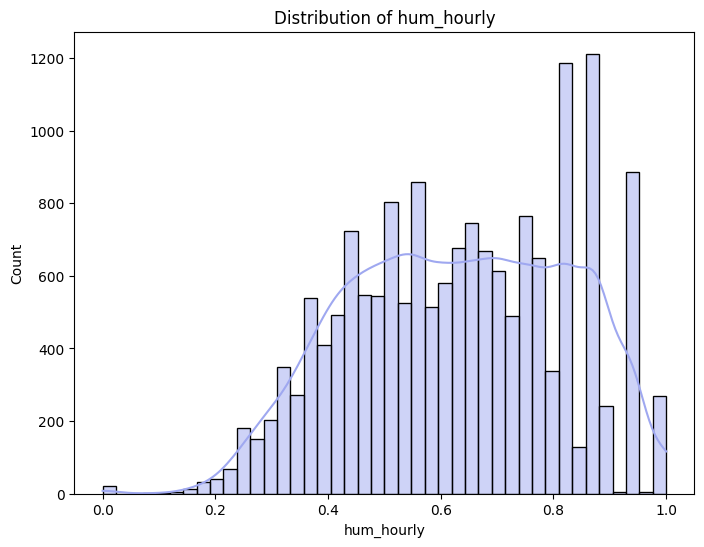

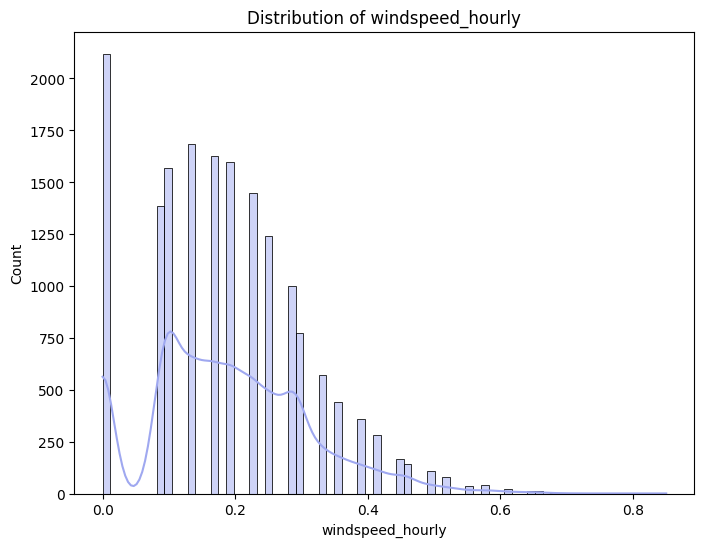

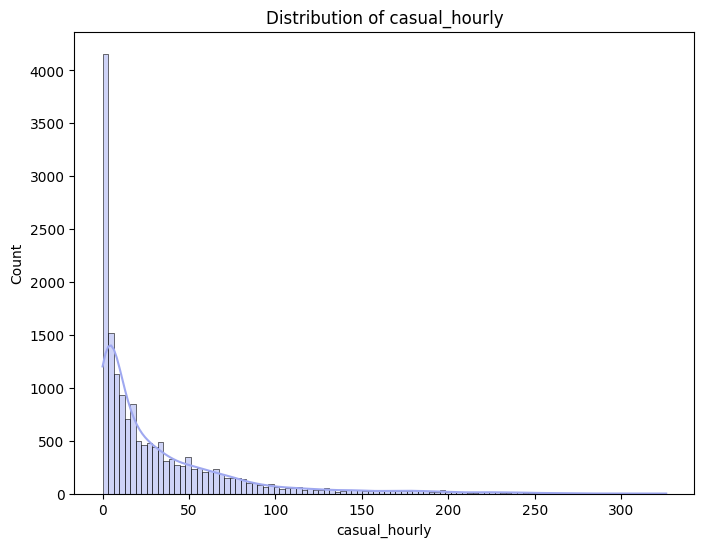

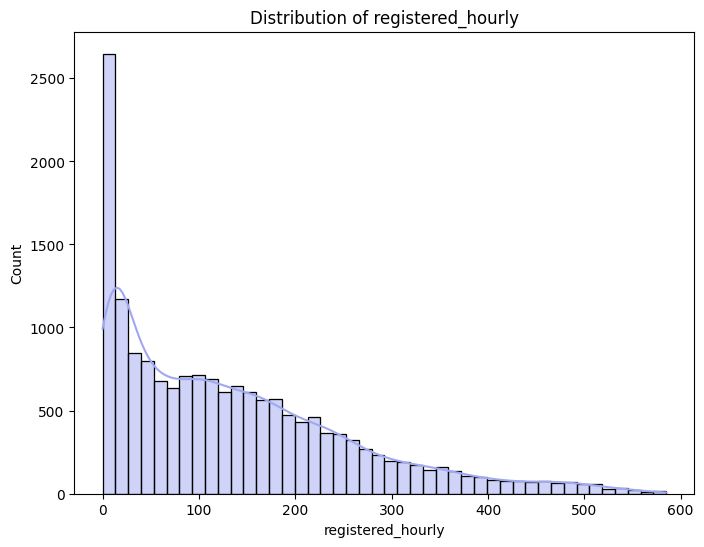

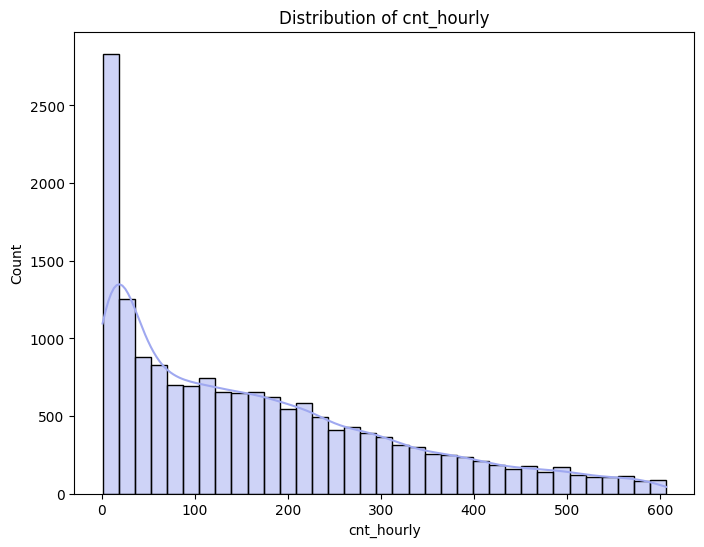

In [103]:
for column in df_bikesharing_cleaned.columns:
  if pd.api.types.is_numeric_dtype(df_bikesharing_cleaned[column]):
    plt.figure(figsize=(8, 6))
    sns.histplot(df_bikesharing_cleaned[column], color='#9fa8f0', kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


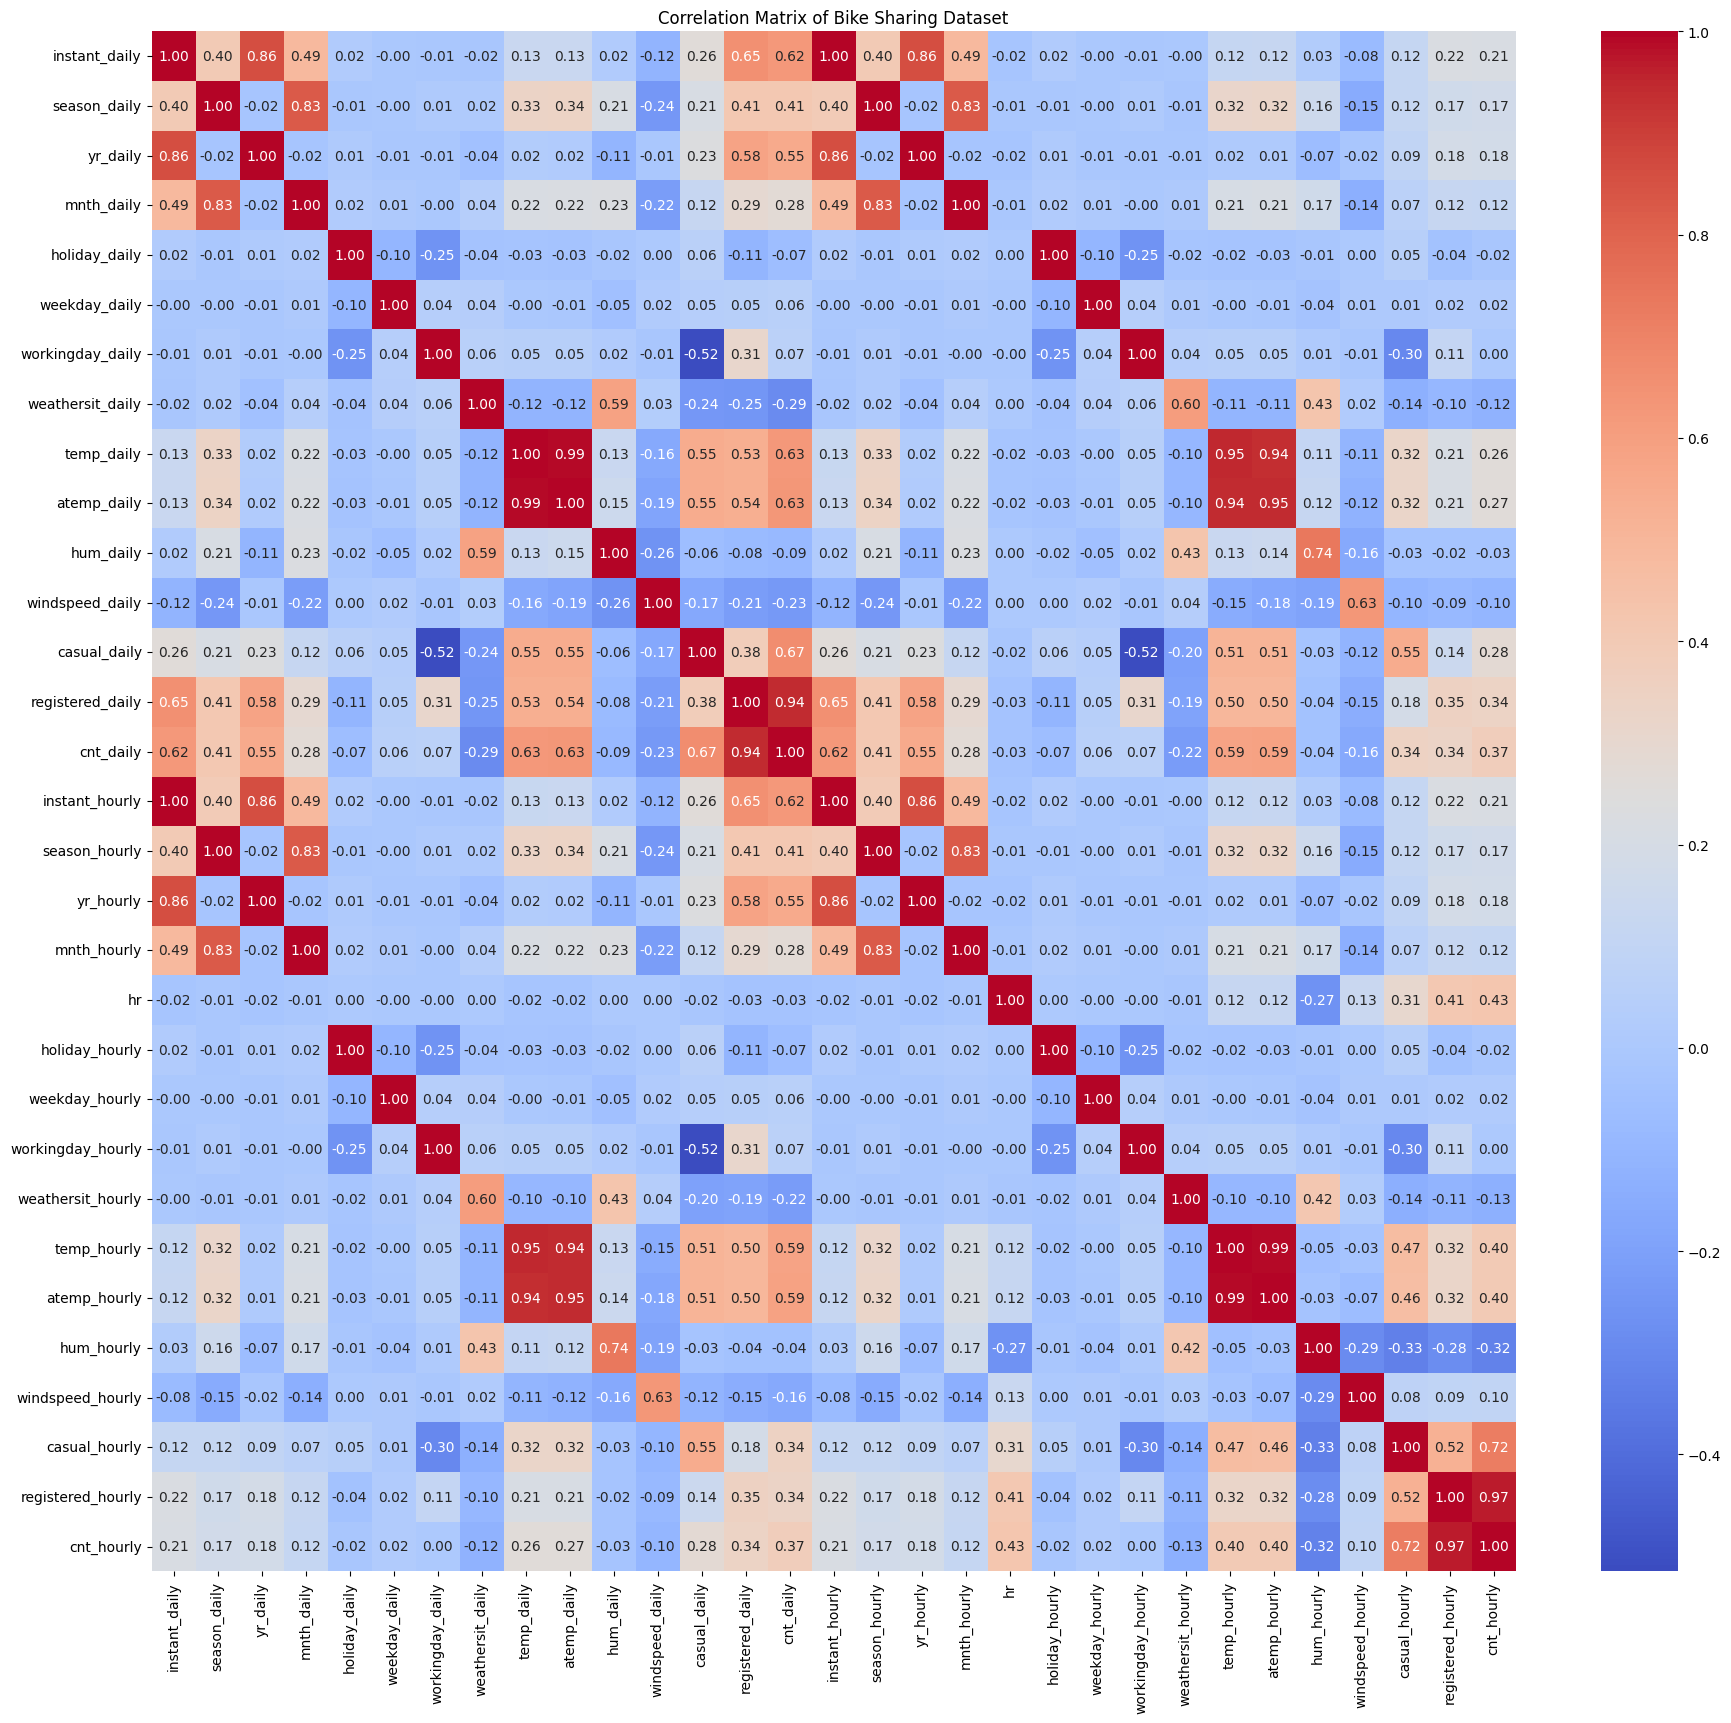

In [113]:
# Calculate the correlation matrix only for numeric columns
correlation_matrix = df_bikesharing_cleaned.corr(numeric_only=True)

plt.figure(figsize=(22, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Bike Sharing Dataset')
plt.show()

**Insight:**




*   Pengguna terdaftar (registered) lebih banyak menyumbang terhadap total penyewaan sepeda dibandingkan pengguna kasual
*   Temperatur memiliki pengaruh yang positif terhadap jumlah penyewaan, sementara cuaca buruk (misalnya hujan atau angin kencang) menurunkan permintaan.
*   Musim juga memiliki pengaruh yang signifikan terhadap permintaan penyewaan sepeda, dengan musim panas atau semi cenderung memiliki penyewaan yang lebih tinggi.
*   Hari libur dan hari kerja tidak memiliki pengaruh besar terhadap jumlah penyewaan, tetapi jam dan musim lebih memengaruhi pola penyewaan.






## Visualization & Explanatory Analysis

Data visualization merupakan tahapan yang harus kita lakukan sebelum membuat kesimpulan dan mengomunikasikan (draw conclusion & communicate) hasil dari proses analisis yang telah dilakukan.

### Pertanyaan 1: Bagaimana pola permintaan sepeda berdasarkan musim dan cuaca?

<ipython-input-81-f004cdcc590f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_demand.index, y=seasonal_demand.values, palette="Blues")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupi

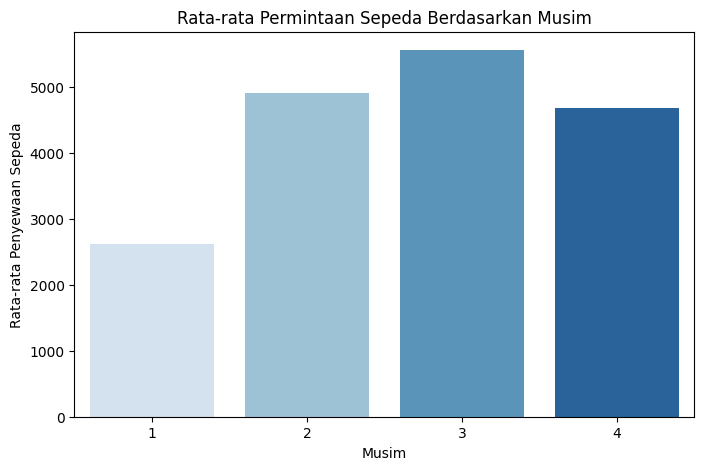

In [81]:
# Rata-rata permintaan berdasarkan musim
seasonal_demand = df_bikesharing_cleaned.groupby('season_daily')['cnt_daily'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_demand.index, y=seasonal_demand.values, palette="Blues")
plt.title('Rata-rata Permintaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()


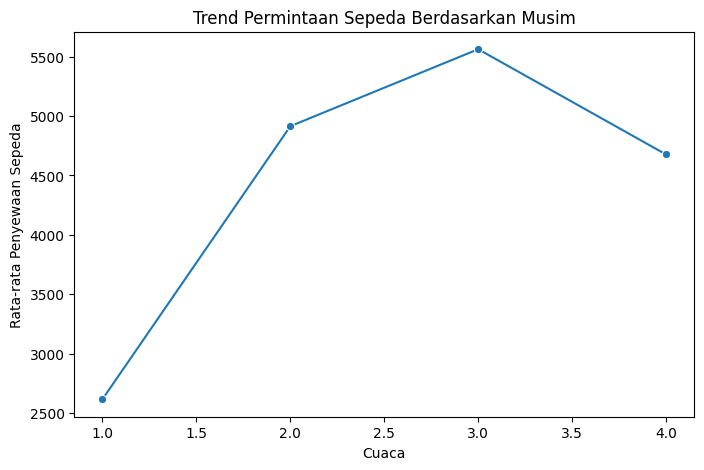

In [86]:
weather_demand = df_bikesharing.groupby('season_daily')['cnt_daily'].mean()

plt.figure(figsize=(8, 5))
sns.lineplot(x=weather_demand.index, y=weather_demand.values, marker='o')
plt.title('Trend Permintaan Sepeda Berdasarkan Musim')
plt.xlabel('Cuaca')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()

**Insight**

Permintaan penyewaan sepeda berada di titik paling tinggi pada saat musim gugur, dan menurun perlahan menuju musim dingin, kemudia kembali naik saat musim semi dan musim panas


<ipython-input-112-e75a77901d16>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_demand.index, y=seasonal_demand.values, palette="Blues")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When group

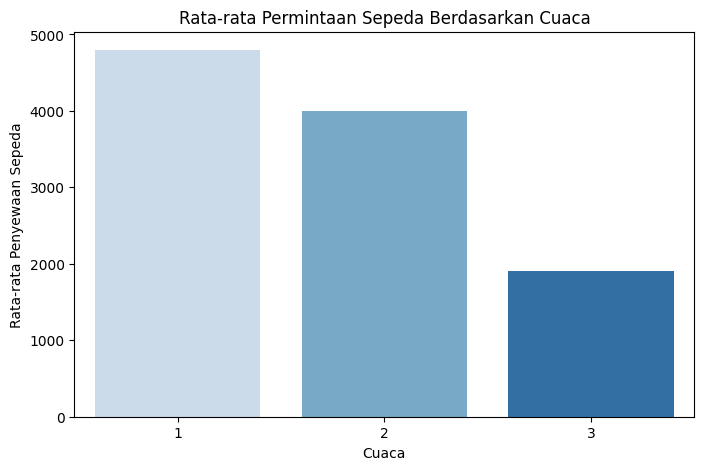

In [112]:
# Rata-rata permintaan berdasarkan cuaca
seasonal_demand = df_bikesharing_cleaned.groupby('weathersit_daily')['cnt_daily'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_demand.index, y=seasonal_demand.values, palette="Blues")
plt.title('Rata-rata Permintaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()


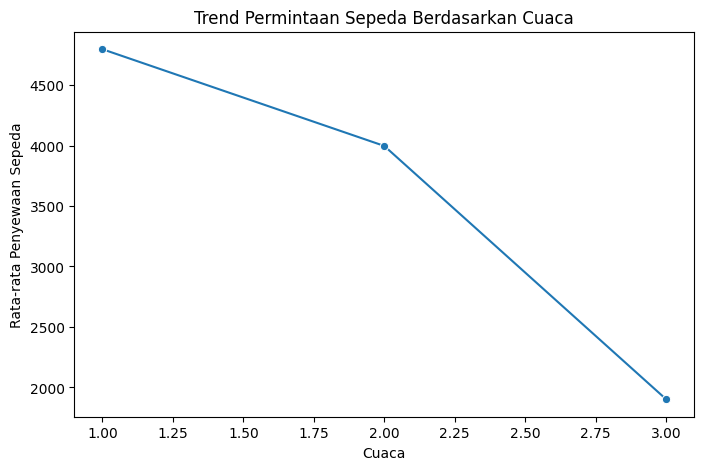

In [114]:
weather_demand = df_bikesharing_cleaned.groupby('weathersit_daily')['cnt_daily'].mean()

plt.figure(figsize=(8, 5))
sns.lineplot(x=weather_demand.index, y=weather_demand.values, marker='o')
plt.title('Trend Permintaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()


**Insight**
Permintaan penyewaan sepeda paling tinggi pada cuaca cerah dan menurun jika cuaca buruk

### Pertanyaan 2: Apa faktor utama yang mempengaruhi lonjakan penyewaan sepeda pada jam-jam tertentu?





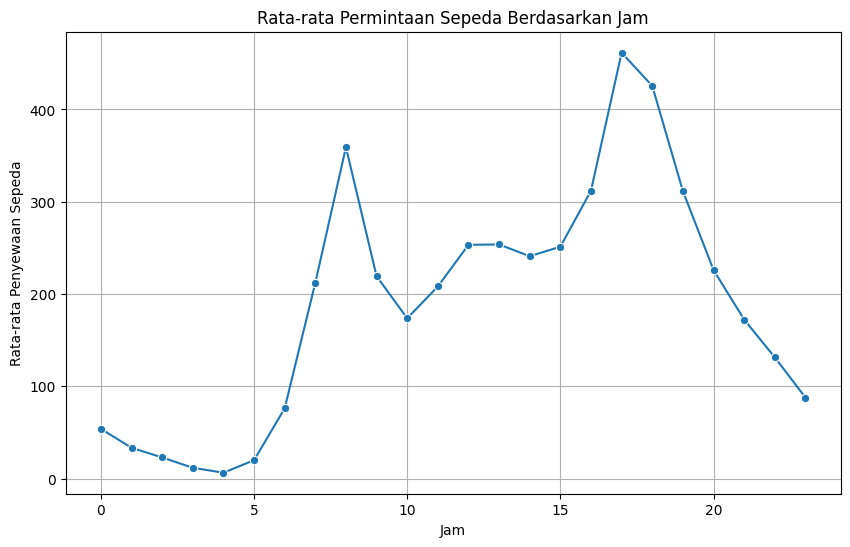

In [91]:
# Rata-rata permintaan berdasarkan jam
hourly_demand = df_hour.groupby('hr')['cnt'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_demand.index, y=hourly_demand.values, marker="o")
plt.title('Rata-rata Permintaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.grid(True)
plt.show()


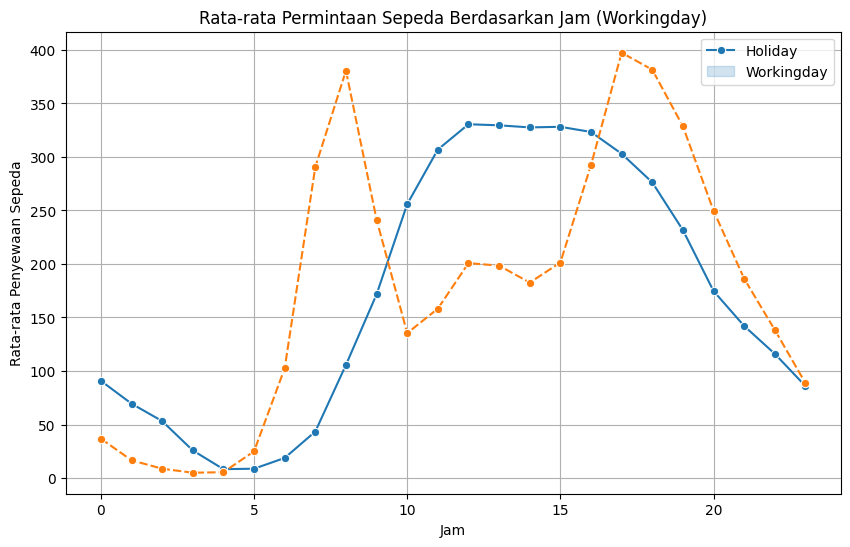

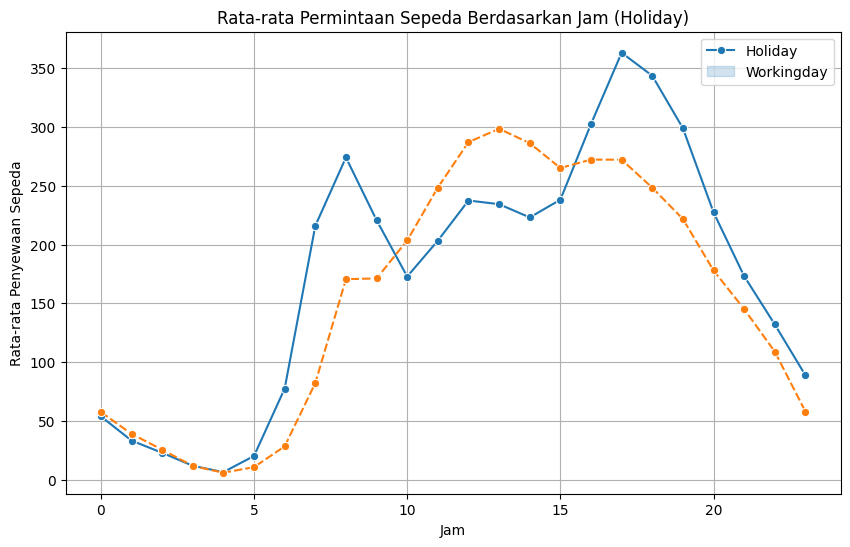

In [111]:
# prompt: generate grafik garis untuk trend Rata-rata permintaan berdasarkan jam pada workingday_hourly dan holiday_houry

# Rata-rata permintaan berdasarkan jam pada workingday
workingday_hourly_demand = df_bikesharing.groupby(['hr', 'workingday_hourly'])['cnt_hourly'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.lineplot(data=workingday_hourly_demand, marker="o")
plt.title('Rata-rata Permintaan Sepeda Berdasarkan Jam (Workingday)')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.grid(True)
plt.legend(['Holiday', 'Workingday'])
plt.show()


# Rata-rata permintaan berdasarkan jam pada holiday
holiday_hourly_demand = df_bikesharing.groupby(['hr', 'holiday_hourly'])['cnt_hourly'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.lineplot(data=holiday_hourly_demand, marker="o")
plt.title('Rata-rata Permintaan Sepeda Berdasarkan Jam (Holiday)')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.grid(True)
plt.legend(['Holiday', 'Workingday'])
plt.show()


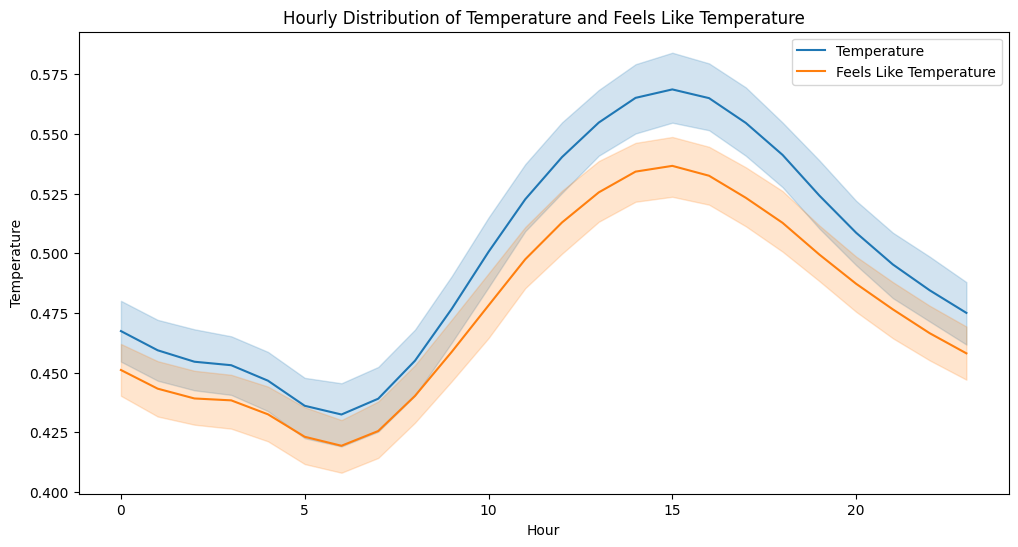

In [98]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='temp', data=df_hour, label='Temperature')
sns.lineplot(x='hr', y='atemp', data=df_hour, label='Feels Like Temperature')
plt.xlabel('Hour')
plt.ylabel('Temperature')
plt.title('Hourly Distribution of Temperature and Feels Like Temperature')
plt.legend()
plt.show()


###**1.Lonjakan Permintaan Berdasarkan Jam (Hari Libur vs. Hari Kerja)**

**Pola Permintaan Berbeda Berdasarkan Hari**

Grafik menunjukkan pola permintaan yang berbeda pada hari libur dan hari kerja. Pada hari kerja, puncak permintaan terjadi di pagi hari sekitar jam 8 (kemungkinan besar karena commuting ke tempat kerja) dan di sore hari antara jam 17-18 (commuting pulang kerja). Sedangkan pada hari libur, lonjakan lebih terlihat sekitar jam 10 pagi hingga sore, dengan puncaknya sekitar jam 15-16.

**Faktor Waktu Commuting**

Pada hari kerja, jelas terlihat bahwa waktu commuting menjadi faktor utama lonjakan penyewaan sepeda, baik pagi maupun sore hari. Orang-orang menggunakan sepeda sebagai transportasi untuk bekerja.

**Faktor Aktivitas Rekreasi pada Hari Libur**

 Pada hari libur, lonjakan terjadi di tengah hari dan sore hari, yang mungkin lebih berkaitan dengan aktivitas rekreasi atau santai yang dilakukan pada waktu tersebut.

###**2. Pengaruh Temperatur:**

**Suhu Mempengaruhi Aktivitas**

 Grafik suhu menunjukkan bahwa puncak temperatur terjadi pada siang hingga sore hari, dan rentang ini tampaknya beririsan dengan lonjakan penyewaan sepeda di hari libur. Ini menunjukkan bahwa temperatur sedang mempengaruhi keputusan orang untuk beraktivitas di luar ruangan, seperti bersepeda. Namun, jika suhu terlalu tinggi, penyewaan mungkin sedikit menurun, seperti terlihat pada penurunan permintaan di sore hari setelah puncak jam 16.


###**3.Pengaruh Kondisi Hari:**

**Holiday vs. Working Day**

Pada hari libur, orang cenderung menyewa sepeda di waktu yang lebih fleksibel, seperti jam 10-16, sementara pada hari kerja, permintaan lebih terkonsentrasi di jam commuting. Artinya, faktor utama yang mempengaruhi lonjakan adalah komutasi harian pada hari kerja dan aktivitas rekreasi pada hari libur.

## Conclusion

###**- Kesimpulan Pertanyaan 1**
Pola trend permintaan penyewaan sepeda akan berada pada puncaknya saat cuaca yang cerah pada musim gugur, dan akan menurun jika cuaca semakin buruk dan saat masuk ke musim dingin








###**- Kesimpulan Pertanyaan 2**
Faktor utama yang mempengaruhi lonjakan penyewaan sepeda pada jam-jam tertentu adalah komutasi (perjalanan ke/dari tempat kerja) pada hari kerja, terutama pada jam-jam sibuk (pagi dan sore). Pada hari libur, lonjakan permintaan lebih terkait dengan aktivitas rekreasi, di mana orang lebih cenderung menyewa sepeda di tengah hari atau sore untuk aktivitas santai. Selain itu, suhu juga berperan penting, di mana penyewaan sepeda cenderung naik ketika suhu lebih nyaman (tidak terlalu panas atau dingin).